In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ground truth function
target_func = lambda x : (x**2 + 5*x - 5) / (x**2 + 1)
x_range = (0, 5)

# data x
x_size = 10
np.random.seed(12345)
x = np.random.uniform(x_range[0], x_range[1], size=x_size)
x_test = np.random.uniform(x_range[0], x_range[1], size=x_size)

print('x=', x)

# calc target 't' and add some noise 'eps'
t = np.array([target_func(v) for v in x])
sigma = 0.2
eps = np.random.normal(loc=0, scale=sigma, size=x_size)
t = t + eps
print('t=', t)
t_test = np.array([target_func(v) for v in x_test])
t_test += np.random.normal(loc=0, scale=sigma, size=x_size)

x= [4.64808046 1.58187777 0.91959406 1.02280139 2.83862515 2.97772351
 4.8225726  3.26588548 3.74453319 3.26784935]
t= [ 2.03327603  1.72246148 -0.15996621  0.49262078  2.23834395  1.81314387
  1.638752    1.98082648  2.49675091  1.68105195]


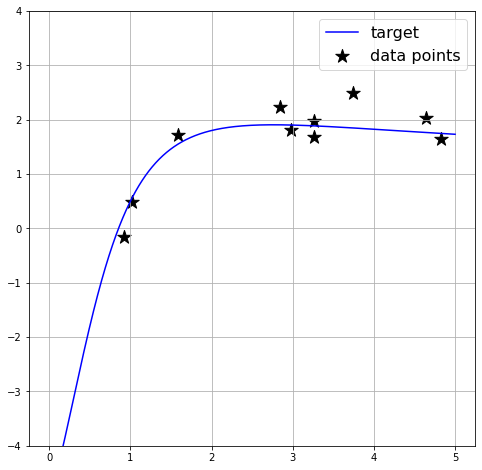

In [3]:
n_grid = 1000
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
t_grid = np.array([target_func(x) for x in x_grid])

plt.figure(figsize=(8, 8))
plt.grid(True)
plt.plot(x_grid, t_grid, color='blue', label='target')
plt.scatter(x, t, marker='*', s=200, color='black', label='data points')
plt.ylim(-4, 4)
plt.legend(loc='best', fontsize=16)

plt.show()

In [4]:
# matrix X generation
degree = 8
X = np.stack([x ** d for d in range(degree+1)], axis=-1)
X

array([[1.00000000e+00, 4.64808046e+00, 2.16046520e+01, 1.00420161e+02,
        4.66760988e+02, 2.16954263e+03, 1.00842087e+04, 4.68722135e+04,
        2.17865820e+05],
       [1.00000000e+00, 1.58187777e+00, 2.50233729e+00, 3.95839174e+00,
        6.26169191e+00, 9.90523125e+00, 1.56688651e+01, 2.47862295e+01,
        3.92087855e+01],
       [1.00000000e+00, 9.19594058e-01, 8.45653232e-01, 7.77657688e-01,
        7.15129389e-01, 6.57628737e-01, 6.04751479e-01, 5.56125867e-01,
        5.11410043e-01],
       [1.00000000e+00, 1.02280139e+00, 1.04612269e+00, 1.06997574e+00,
        1.09437268e+00, 1.11932590e+00, 1.14484809e+00, 1.17095222e+00,
        1.19765156e+00],
       [1.00000000e+00, 2.83862515e+00, 8.05779272e+00, 2.28730530e+01,
        6.49280235e+01, 1.84306320e+02, 5.23176554e+02, 1.48510212e+03,
        4.21564823e+03],
       [1.00000000e+00, 2.97772351e+00, 8.86683733e+00, 2.64029900e+01,
        7.86208043e+01, 2.34111018e+02, 6.97117882e+02, 2.07582431e+03,
        6.1

In [5]:
# min sum-of-squares estimator of weights: w = (X^T X)^{-1} X^T t
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
print('weights=', w)

predicted_func = lambda x, w: np.array([x ** d for d in range(degree+1)]).dot(w)

weights= [-5.70368511e+02  2.24806527e+03 -3.65449066e+03  3.19621691e+03
 -1.64745893e+03  5.15126948e+02 -9.60023522e+01  9.80632766e+00
 -4.22481254e-01]


In [6]:
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=False).fit( X, t )
model.coef_

array([-5.42531284e+02,  2.13532787e+03, -3.46721047e+03,  3.02941697e+03,
       -1.56000606e+03,  4.87322831e+02, -9.07350757e+01,  9.25965820e+00,
       -3.98567320e-01])

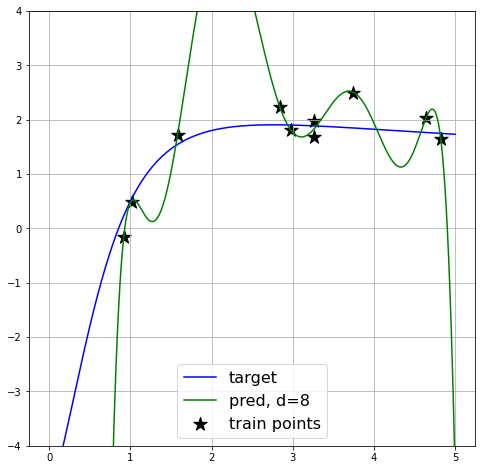

In [7]:
n_grid = 1000
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
t_grid = np.array([target_func(x) for x in x_grid])
pred_grid = np.array([predicted_func(x, w) for x in x_grid])

plt.figure(figsize=(8, 8))
plt.grid(True)
plt.plot(x_grid, t_grid, color='blue', label='target')
plt.scatter(x, t, marker='*', s=200, color='black', label='train points')
plt.plot(x_grid, pred_grid, color='green', label=f'pred, d={degree}')
plt.ylim(-4, 4)
plt.legend(loc='best', fontsize=16)

plt.show()

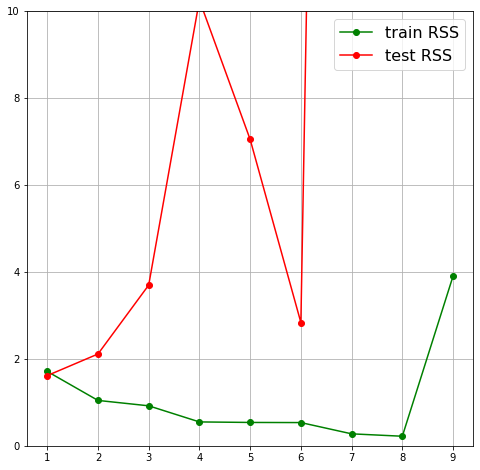

In [8]:
# calc residual sum of squares (RSS) for train & test data
degrees = np.arange(1, 10)
train_rss = []
test_rss = []

for degree in degrees:
    X = np.stack([x ** d for d in range(degree+1)], axis=-1)
    X_test = np.stack([x_test ** d for d in range(degree+1)], axis=-1)
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
    train_errors = t - X.dot(w)
    train_rss.append(np.dot(train_errors, train_errors))
    test_errors = t - X_test.dot(w)
    test_rss.append(np.dot(test_errors, test_errors))

    
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.plot(degrees, np.sqrt(train_rss), color='green', label='train RSS', marker='o')
plt.plot(degrees, np.sqrt(test_rss), color='red', label='test RSS', marker='o')
plt.ylim(0, 10)
plt.legend(loc='best', fontsize=16)
plt.show()

# OVERFITTING for large degrees

In [9]:
# REGULARIZATION

# matrix X generation
degree = 8
X = np.stack([x ** d for d in range(degree+1)], axis=-1)

# min sum-of-squares estimator of weights: w = (X^T X)^{-1} X^T t
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
print('weights=', w)
lmbd = 0.0001
w_reg = np.linalg.inv(X.T.dot(X) + lmbd * np.identity(degree+1)).dot(X.T).dot(t)
print('weights_reg=', w_reg)

predicted_func = lambda x, w: w.dot([x ** d for d in range(degree+1)])

weights= [-5.70368511e+02  2.24806527e+03 -3.65449066e+03  3.19621691e+03
 -1.64745893e+03  5.15126948e+02 -9.60023522e+01  9.80632766e+00
 -4.22481254e-01]
weights_reg= [-3.03263334  5.40535986 -2.69251335 -2.76182348  6.66167023 -4.63128118
  1.4757481  -0.22279003  0.01291956]


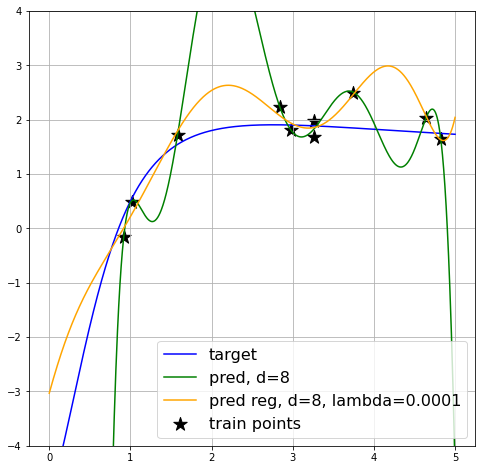

In [10]:
n_grid = 1000
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
t_grid = np.array([target_func(x) for x in x_grid])
pred_grid = np.array([predicted_func(x, w) for x in x_grid])
pred_reg_grid = np.array([predicted_func(x, w_reg) for x in x_grid])

plt.figure(figsize=(8, 8))
plt.grid(True)
plt.plot(x_grid, t_grid, color='blue', label='target')
plt.scatter(x, t, marker='*', s=200, color='black', label='train points')
plt.plot(x_grid, pred_grid, color='green', label=f'pred, d={degree}')
plt.plot(x_grid, pred_reg_grid, color='orange', label=f'pred reg, d={degree}, lambda={lmbd}')

plt.ylim(-4, 4)
plt.legend(loc='best', fontsize=16)

plt.show()

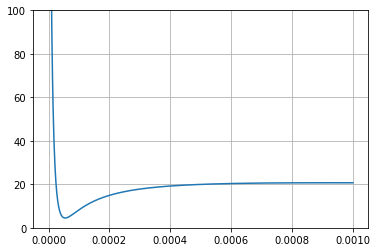

In [11]:
#log_lambdas = np.linspace(1, 50, 200)
lambdas = np.linspace(0, 0.001, 1000)
test_rss = []

#for log_lambda in log_lambdas:
for lmbd in lambdas:
    #lmbd = np.exp(log_lambda)
    w_reg = np.linalg.inv(X.T.dot(X) + lmbd * np.identity(degree+1)).dot(X.T).dot(t)
    pred_reg_test = predicted_func(x_test, w_reg)
    errors = t_test - pred_reg_test
    test_rss.append(np.dot(errors, errors))

#print(test_rss)
plt.plot(lambdas, test_rss, label='test error')
plt.ylim(0, 100)
plt.grid(True)
plt.show()